In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

from matplotlib.colors import ListedColormap

from sklearn.datasets import make_blobs # pour la génération des données
from sklearn.neighbors import KNeighborsClassifier as KNN # classifieur des K plus proches voisins

A l'aide de la fonction <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html">make_blobs</a> de scikit-learn on peut générer simplement des mélanges de gaussiennes.

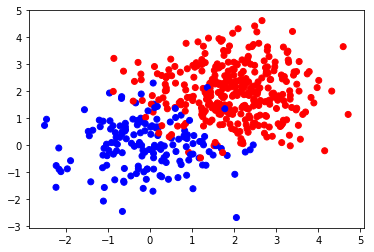

In [107]:
n = 500 # nombre d'observations 

p = 0.3 # probabilité d'appartenir à la première classe
means = [[0, 0],[2, 2]] # positions des moyennes de chaque centre
stds = [1., 1.] # la classe i has a covariance matrix which is (stds[i])^2*Id

n1 = np.sum(np.random.rand(n)<p) # nombre de points dans la première classe
samples = [n1,n-n1]

colors = np.array(['b', 'r'])

X_train, y_train = make_blobs(n_samples=samples,centers=means,cluster_std=stds,shuffle=True)

plt.scatter(X_train[:,0], X_train[:,1], c=colors[y_train])
plt.show()

Essayons le classifieur des k plus proches voisins sur ce jeu de données très simple. Afin de pourvoir s'évaluer la première étape est de générer une base de données de test, suivant la même distribution. 

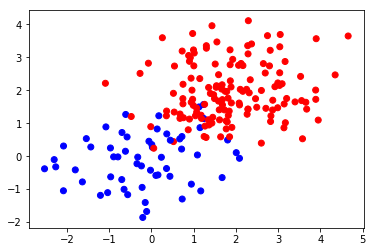

In [108]:
m = 200 # nombre de données de test 

m1 = np.sum(np.random.rand(m)<p) 
samples_test = [m1,m-m1]
X_test, y_test = make_blobs(n_samples=samples_test,centers=means,cluster_std=stds,shuffle=True)

plt.scatter(X_test[:,0], X_test[:,1], c=colors[y_test])
plt.show()

On peut visualiser ces données (on voit qu'elles "ressemblent" aux précédentes), mais on n'a pas le droit d'y toucher pour l'apprentissage d'un bon classifieur, elles ne serviront qu'à l'évaluation du classifieur !

## Création du classifieur

In [109]:
k = 2 # nombre de voisins

# créer un objet "classifieur" et l'entrainer sur la base d'apprentissage 
clf = KNN(n_neighbors=k)
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

L'objet clf peut maintenant être utilisé pour faire des prédictions sur les données de test, que l'on peut comparer aux vraies étiquettes de ces données.

In [110]:
y_pred = clf.predict(X_test)

d = {'truth': y_test, 'prediction': y_pred}
df = pd.DataFrame(data=d)
print(df)

     truth  prediction
0        1           1
1        1           1
2        0           0
3        1           1
4        0           0
5        1           1
6        0           1
7        1           1
8        0           0
9        1           1
10       1           1
11       0           0
12       1           1
13       0           0
14       0           1
15       1           1
16       1           1
17       1           1
18       0           0
19       0           0
20       1           1
21       1           1
22       1           1
23       1           1
24       0           0
25       1           1
26       0           0
27       0           0
28       0           0
29       1           0
..     ...         ...
170      1           1
171      1           0
172      0           0
173      1           1
174      1           1
175      1           1
176      1           0
177      1           1
178      1           1
179      1           1
180      1           1
181      1 

Pour évaluer la qualité du prédicteur par un indicateur numérique, on va plutôt calculer l'erreur de test (estimateur sans biais du risque de classification).

In [111]:
TestError = np.mean(y_pred!=y_test)
print("\n L'erreur de test est ",TestError)


 L'erreur de test est  0.11


On peut également calculer l'erreur d'apprentissage, qui est la fraction d'erreurs quand on prédit les étiquettes des points de la base d'apprentissage. 

In [112]:
y_pred_train = clf.predict(X_train)
TrainError = np.mean(y_pred_train!=y_train)
print("\n L'erreur d'apprentissage est ",TrainError)


 L'erreur d'apprentissage est  0.038


## Visualisation d'un classifieur des k-plus proches voisins 

Dans l'exemple précédemment, pour évaluer le classifieur, on l'a testé sur un certains nombre de données de test, en calculant sa valeur à chaque fois. On peut également visualiser les prédictions faites par ce classifieur en colorant les régions de l'espace des variables explicatives (ici $\mathbb{R}^2$) en fonction de la valeur prise par le classifieur. Cela fera en particulier apparaître des frontières de décision. 

Pour cela, on va définir une grille (mesh) assez fine et calculer le classifieur en tous les points de cette grille. 

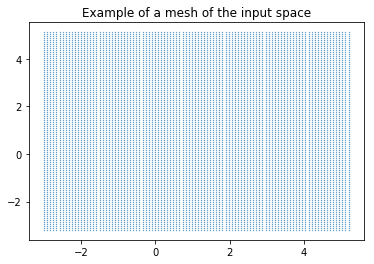

In [113]:
# Define the shape of a box that surrounds your points
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5

# Mesh this box
x1, x2 = np.meshgrid(np.linspace(x_min, x_max, 100),np.linspace(y_min, y_max, 100))
X_mesh = np.column_stack([x1.ravel(), x2.ravel()])

plt.title('Example of a mesh of the input space')
plt.scatter(X_mesh[:, 0], X_mesh[:, 1], s=0.1)
plt.show()

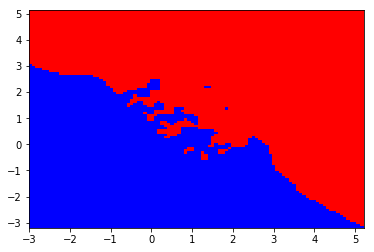

In [122]:
k = 1 # nombre de voisins

clf = KNN(n_neighbors=k)
clf.fit(X_train,y_train)

# on calcule les prédictions sur tous les points de la grille
Z = clf.predict(X_mesh)


# on visualise 
plt.figure()

cmap_light = ListedColormap(['blue', 'red'])
Z = Z.reshape(x1.shape)
plt.pcolormesh(x1, x2, Z,cmap=cmap_light)


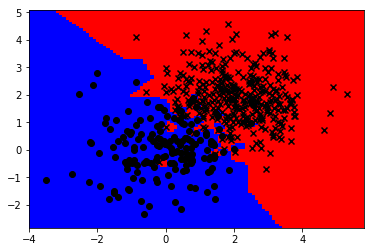

In [104]:
plt.pcolormesh(x1, x2, Z,cmap=cmap_light)

#on ajoute les points de la base d'apprentissage 
marks=np.array(["x","+"])

firstclass=np.where(y_train==0)
plt.scatter(X_train[firstclass,0], X_train[firstclass,1], marker='o',color='k')

secondclass=np.where(y_train==1)
plt.scatter(X_train[secondclass,0], X_train[secondclass,1], marker='x',color='k')


plt.show()